d-sandbox

<div style="text-align: center; line-height: 0; padding-top: 9px;">
  <img src="https://databricks.com/wp-content/uploads/2018/03/db-academy-rgb-1200px.png" alt="Databricks Learning" style="width: 600px">
</div>

# Basic Classification

## Configuration

In [0]:
pip install mlflow

Python interpreter will be restarted.
Collecting mlflow
 Downloading mlflow-1.18.0-py3-none-any.whl (14.2 MB)
Collecting cloudpickle
 Downloading cloudpickle-1.6.0-py3-none-any.whl (23 kB)
Requirement already satisfied: requests>=2.17.3 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (2.24.0)
Collecting click>=7.0
 Downloading click-8.0.1-py3-none-any.whl (97 kB)
Collecting sqlparse>=0.3.1
 Downloading sqlparse-0.4.1-py3-none-any.whl (42 kB)
Requirement already satisfied: pandas in /databricks/python3/lib/python3.8/site-packages (from mlflow) (1.1.5)
Collecting sqlalchemy
 Downloading SQLAlchemy-1.4.20-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.6 MB)
Collecting querystring-parser
 Downloading querystring_parser-1.2.4-py2.py3-none-any.whl (7.9 kB)
Collecting Flask
 Downloading Flask-2.0.1-py3-none-any.whl (94 kB)
Collecting docker>=4.0.0
 Downloading docker-5.0.0-py2.py3-none-any.whl (146 kB)
Collecting databricks-cli>=0.8.7
 Downloading databricks-cli-0.14.3.tar.gz (54 kB)
Collecting gunicorn; platform_system != "Windows"
 Downloading gunicorn-20.1.0-py3-none-any.whl (79 kB)
Requirement already satisfied: entrypoints in /databricks/python3/lib/python3.8/site-packages (from mlflow) (0.3)
Collecting alembic<=1.4.1
 Downloading alembic-1.4.1.tar.gz (1.1 MB)
Collecting prometheus-flask-exporter
 Downloading prometheus_flask_exporter-0.18.2.tar.gz (22 kB)
Collecting packaging
 Downloading packaging-21.0-py3-none-any.whl (40 kB)
Requirement already satisfied: numpy in /databricks/python3/lib/python3.8/site-packages (from mlflow) (1.19.2)
Collecting pyyaml>=5.1
 Downloading PyYAML-5.4.1-cp38-cp38-manylinux1_x86_64.whl (662 kB)
Collecting gitpython>=2.1.0
 Downloading GitPython-3.1.18-py3-none-any.whl (170 kB)
Requirement already satisfied: protobuf>=3.7.0 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (3.17.0)
Requirement already satisfied: pytz in /databricks/python3/lib/python3.8/site-packages (from mlflow) (2020.5)
Requirement already satisfied: idna<3,>=2.5 in /databricks/python3/lib/python3.8/site-packages (from requests>=2.17.3->mlflow) (2.10)
Requirement already satisfied: certifi>=2017.4.17 in /databricks/python3/lib/python3.8/site-packages (from requests>=2.17.3->mlflow) (2020.12.5)
Requirement already satisfied: urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1 in /databricks/python3/lib/python3.8/site-packages (from requests>=2.17.3->mlflow) (1.25.11)
Requirement already satisfied: chardet<4,>=3.0.2 in /databricks/python3/lib/python3.8/site-packages (from requests>=2.17.3->mlflow) (3.0.4)
Requirement already satisfied: python-dateutil>=2.7.3 in /databricks/python3/lib/python3.8/site-packages (from pandas->mlflow) (2.8.1)
Collecting greenlet!=0.4.17; python_version >= "3"
 Downloading greenlet-1.1.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (164 kB)
Requirement already satisfied: six in /databricks/python3/lib/python3.8/site-packages (from querystring-parser->mlflow) (1.15.0)
Collecting itsdangerous>=2.0
 Downloading itsdangerous-2.0.1-py3-none-any.whl (18 kB)
Collecting Werkzeug>=2.0
 Downloading Werkzeug-2.0.1-py3-none-any.whl (288 kB)
Collecting Jinja2>=3.0
 Downloading Jinja2-3.0.1-py3-none-any.whl (133 kB)
Collecting websocket-client>=0.32.0
 Downloading websocket_client-1.1.0-py2.py3-none-any.whl (68 kB)
Collecting tabulate>=0.7.7
 Downloading tabulate-0.8.9-py3-none-any.whl (25 kB)
Requirement already satisfied: setuptools>=3.0 in /databricks/python3/lib/python3.8/site-packages (from gunicorn; platform_system != "Windows"->mlflow) (50.3.1)
Collecting Mako
 Downloading Mako-1.1.4-py2.py3-none-any.whl (75 kB)
Collecting python-editor>=0.3
 Downloading python_editor-1.0.4-py3-none-any.whl (4.9 kB)
Collecting prometheus_client
 Downloading prometheus_client-0.11.0-py2.py3-none-any.whl (56 kB)
Requirement already satisfied: pyparsing>=2.0.2 in /databricks/python3/lib/python3.8/site-packages (from packaging->mlflow) (2.4.7)
Coll

In [0]:
%run ./includes/configuration

### Load Data and Scipy Libraries

In [0]:
%run ./includes/preprocessing

### Create Feature and Target Objects

In [0]:
features = health_tracker_sample_agg_pd_df.select_dtypes(exclude=["object"])
target = health_tracker_sample_agg_pd_df[["lifestyle"]].copy()

### Numerically Encode the Target

Pass the `lifestyle` column from the `target` DataFrame to the
`LabelEncoder`.

In [0]:
# TODO
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target["lifestyle_encoded"] = le.fit_transform(target["lifestyle"])

In [0]:
target

Out[14]:

,lifestyle,lifestyle_encoded
0,weight trainer,2
1,weight trainer,2
2,weight trainer,2
3,sedentary,1
4,sedentary,1
...,...,...
90,weight trainer,2
91,cardio trainer,0
92,sedentary,1
93,weight trainer,2


### Prepare a Two-Dimensional Projection of the Features using T-SNE

In [0]:
from sklearn.manifold import TSNE

np.random.seed(10)
tsne = TSNE(n_components=2)

features_in_two_dimensions = tsne.fit_transform(features)
features_in_two_dimensions = pd.DataFrame(features_in_two_dimensions)

### Split the 2D Data into Training and Testing Sets

In [0]:
from sklearn.model_selection import train_test_split

(features_2d_train,
 features_2d_test,
 target_train,
 target_test) = train_test_split(features_in_two_dimensions,
                                 target.lifestyle_encoded)

### Fit a Logistic Regression Model to the 2D Data

In [0]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='none')

lr.fit(features_2d_train, target_train)
lr.score(features_2d_test, target_test)

Out[17]: 0.9166666666666666

### Plot the Logistic Regression Fit and Decision Boundary

🤖 We use the helper function, `scatter_plot_with_decision_boundary`.

This function is loaded above when we source the `scipy_stack` notebook.

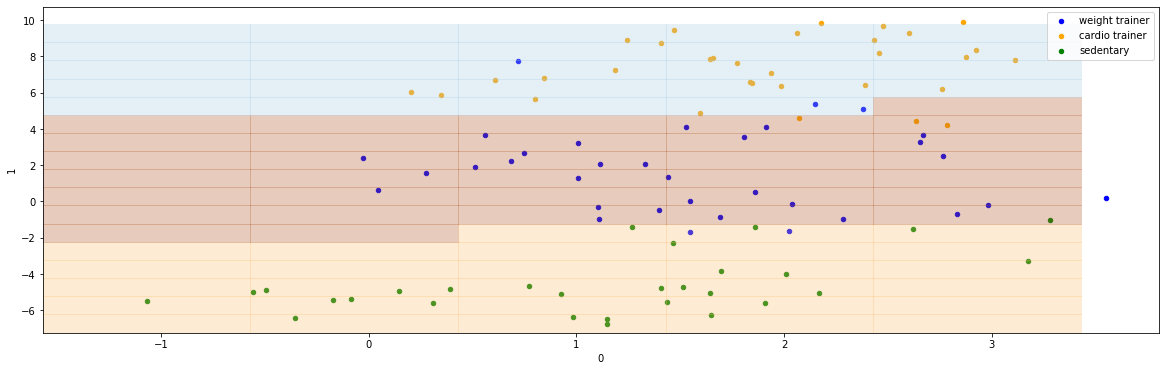

In [0]:
fig, ax = plt.subplots(figsize=(20,6))

scatter_plot_with_decision_boundary(
  ax, features_in_two_dimensions, target, lr
)

### Split the Data into Training and Testing Sets

In [0]:
# TODO
from sklearn.model_selection import train_test_split

(features_train,
 features_test,
 target_train,
 target_test) = train_test_split(features, target.lifestyle_encoded)

### Fit a Logistic Regression Model to the Data

1. fit the model on the training data
1. score the model on the testing data

In [0]:
# TODO
lr = LogisticRegression(penalty='none')
lr.fit(features_train, target_train)
lr.score(features_test, target_test)

/databricks/python/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
 https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
 https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 n_iter_i = _check_optimize_result(
Out[20]: 0.9583333333333334

### Fit a Logistic Regression Model to the Data

Fit the model again, increasing the maximum number of
iterations to avoid the convergence warning.

1. fit the model on the training data
1. score the model on the testing data

In [0]:
# TODO
lr = LogisticRegression(penalty='none', max_iter=1e4)

lr.fit(features_train, target_train)
lr.score(features_test, target_test)


Out[21]: 0.9166666666666666

-sandbox
&copy; 2020 Databricks, Inc. All rights reserved.<br/>
Apache, Apache Spark, Spark and the Spark logo are trademarks of the <a href="http://www.apache.org/">Apache Software Foundation</a>.<br/>
<br/>
<a href="https://databricks.com/privacy-policy">Privacy Policy</a> | <a href="https://databricks.com/terms-of-use">Terms of Use</a> | <a href="http://help.databricks.com/">Support</a>